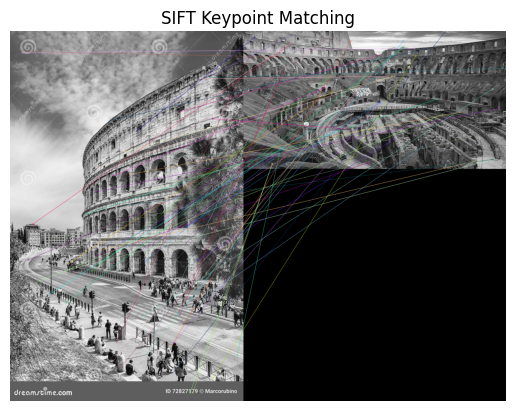

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load images in grayscale
img1 = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)

# SIFT detector
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply Lowe's Ratio Test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

# Draw matches
result = cv2.drawMatches(img1, kp1, img2, kp2, good, None, flags=2)

plt.imshow(result)
plt.title("SIFT Keypoint Matching")
plt.axis('off')
plt.show()
